In [4]:
#라이브러리 로드
import pandas as pd

In [5]:
## 코로나 데이터를 로드
## 상위 폴더로 이동 -> csv 폴더로 이동 -> corona.csv 파일 지정
corona = pd.read_csv("../csv/corona.csv")
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [11]:
## 컬럼을 삭제
## drop() 함수를 이용하여 컬럼을 삭제---------1=열   0=행
## axis라는 매개변수의 값을 기준으로 행, 열을 지정
## inplace 매개변수의 값을 기준으로 기준이되는 데이터를 변경을 할지 지정

corona.drop(["Unnamed: 0"], axis=1)


corona.drop(["Unnamed: 0"], axis=1, inplace=True)
#corona = corona.drop(['Unnamed:0'], axis=1) 
   

In [12]:
corona.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [15]:
## 컬럼의 이름을 변경
## 컬럼의 목록 출력 방법
corona.columns = ['등록일시','총 사망자','총 확진자','게시글 번호','기준일','기준 시간','수정일시','누적 의심자','누적 확진률']

In [17]:
corona.head()

,등록일시,총 사망자,총 확진자,게시글 번호,기준일,기준 시간,수정일시,누적 의심자,누적 확진률
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [22]:
## 게시글 번호, 기준일, 기준시간 컬럼을 삭제
corona.drop(['게시글 번호','기준일','기준 시간'], axis=1, inplace=True)

In [25]:
### 데이터프레임의 정렬을 변경
### 등록일시를 기준으로 오름차순 정렬로 변경
### sort_values([기준이 되는 컬럼명]) 함수 사용
### ascending 매개변수의 값이 True(기본값)면 오름차순, False면 내림차순으로 정렬

corona.sort_values(['등록일시'], inplace=True)

In [29]:
## 인덱스의 값을 초기화
## reset_index()
corona.reset_index(drop=True, inplace=True)

In [30]:
## 결측치 조회
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일시    820 non-null    object 
 1   총 사망자   820 non-null    int64  
 2   총 확진자   820 non-null    int64  
 3   수정일시    817 non-null    object 
 4   누적 의심자  692 non-null    float64
 5   누적 확진률  623 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 38.6+ KB


In [31]:
corona.isna().sum()

등록일시        0
총 사망자       0
총 확진자       0
수정일시        3
누적 의심자    128
누적 확진률    197
dtype: int64

In [32]:
## 데이터 간의 차이를 출력하는 함수
## diff(n)  : n은 인덱스의 이동 횟수 (n은 기본값 1)
corona['총 확진자'].diff()

0          NaN
1        242.0
2        114.0
3        110.0
4        107.0
        ...   
815    12039.0
816     9834.0
817     5022.0
818     6172.0
819    13358.0
Name: 총 확진자, Length: 820, dtype: float64

In [33]:
corona['일일 확진자'] = corona['총 확진자'].diff()

In [34]:
corona

,등록일시,총 사망자,총 확진자,수정일시,누적 의심자,누적 확진률,일일 확진자
0,2020-03-10 00:00:00.000,54,7513,2021-10-07 10:30:51.51,210144.0,3.919308,NaN
1,2020-03-11 00:00:00.000,60,7755,2021-10-07 10:30:51.51,222395.0,3.804175,242.0
2,2020-03-12 00:00:00.000,66,7869,2021-10-07 10:30:51.51,234998.0,3.621744,114.0
3,2020-03-13 00:00:00.000,67,7979,2021-10-07 10:30:51.51,248647.0,3.458499,110.0
4,2020-03-14 00:00:00.000,72,8086,2021-10-07 10:30:51.51,261335.0,3.318000,107.0
...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,2022-06-08 09:11:26.303,NaN,NaN,12039.0
816,2022-06-05 08:53:19.426,24258,18163648,2022-06-08 09:11:04.758,NaN,NaN,9834.0
817,2022-06-06 09:00:06.734,24279,18168670,2022-06-08 09:10:50.441,NaN,NaN,5022.0
818,2022-06-07 09:09:00.897,24299,18174842,2022-06-08 09:10:36.846,NaN,NaN,6172.0


In [35]:
## 일일 사망자 컬럼을 생성
corona['일일 사망자'] = corona['총 사망자'].diff()

In [36]:
corona

,등록일시,총 사망자,총 확진자,수정일시,누적 의심자,누적 확진률,일일 확진자,일일 사망자
0,2020-03-10 00:00:00.000,54,7513,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


In [37]:
## 인덱스를 이동
## shift(n) n만큼 인덱스 이동

corona['총 사망자'].shift(1)

0          NaN
1         54.0
2         60.0
3         66.0
4         67.0
        ...   
815    24229.0
816    24238.0
817    24258.0
818    24279.0
819    24299.0
Name: 총 사망자, Length: 820, dtype: float64

In [38]:
corona['총 사망자'] - corona['총 사망자'].shift(1)

0       NaN
1       6.0
2       6.0
3       1.0
4       5.0
       ... 
815     9.0
816    20.0
817    21.0
818    20.0
819     6.0
Name: 총 사망자, Length: 820, dtype: float64

In [44]:
## 결측치를 다른 값으로 대체
## fillna(n) : 결측치를 n으로 채워준다.

## 일일 확진자, 일일 사망자의 결측치를 0으로 대체
corona[['일일확진자','일일 사망자']] = corona[['일일 확진자','일일 사망자']].fillna(0)

In [45]:
corona.head()

,등록일시,총 사망자,총 확진자,수정일시,누적 의심자,누적 확진률,일일 확진자,일일 사망자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,242.0
2,2020-03-12 00:00:00.000,66,7869,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,114.0
3,2020-03-13 00:00:00.000,67,7979,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,110.0
4,2020-03-14 00:00:00.000,72,8086,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,107.0


In [46]:
## fillna() method 매개변수 -> fill(앞 데이터로 결측치를 메꿈), bfill(뒷 데이터로 결측치를 메꿈)

In [47]:
corona['누적 의심자'] = corona['누적 의심자'].fillna(method='ffill')

In [48]:
corona.iloc[690:695]

,등록일시,총 사망자,총 확진자,수정일시,누적 의심자,누적 확진률,일일 확진자,일일 사망자,일일확진자
690,2022-01-30 09:13:00.269,6732,828611,2022-02-07 09:05:54.937,21448119.0,NaN,17522.0,20.0,17522.0
691,2022-01-31 09:22:37.347,6755,845688,2022-02-07 09:06:04.861,21518073.0,NaN,17077.0,23.0,17077.0
692,2022-02-01 09:06:24.411,6772,864026,2022-02-09 13:04:21.424,21518073.0,NaN,18338.0,17.0,18338.0
693,2022-02-02 09:04:49.92,6787,884294,2022-02-09 13:04:29.013,21518073.0,NaN,20268.0,15.0,20268.0
694,2022-02-03 08:46:14.856,6812,907200,2022-02-09 13:04:42.741,21518073.0,NaN,22906.0,25.0,22906.0


In [49]:
### 데이터 시각화 라이브러리 matplotlib
## 라이브러리 설치
!pip install matplotlib

     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     -- ------------------------------------- 0.4/7.2 MB 12.8 MB/s eta 0:00:01
     ---- ----------------------------------- 0.9/7.2 MB 13.5 MB/s eta 0:00:01
     ------- -------------------------------- 1.3/7.2 MB 13.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.2 MB 12.0 MB/s eta 0:00:01
     ----------- ---------------------------- 2.0/7.2 MB 11.7 MB/s eta 0:00:01
     ------------ --------------------------- 2.2/7.2 MB 10.8 MB/s eta 0:00:01
     ------------- -------------------------- 2.4/7.2 MB 10.0 MB/s eta 0:00:01
     -------------- ------------------------- 2.6/7.2 MB 9.0 MB/s eta 0:00:01
     --------------- ------------------------ 2.8/7.2 MB 8.8 MB/s eta 0:00:01
     ---------------- ----------------------- 2.9/7.2 MB 8.5 MB/s eta 0:00:01
     ----------------- ---------------------- 3.1/7.2 MB 8.0 MB/s eta 0:00:01
     ------------------ --------------------- 3.3/7.2 MB 7.9 MB/

In [50]:
## 라이브러리 로드
import matplotlib.pyplot as plt

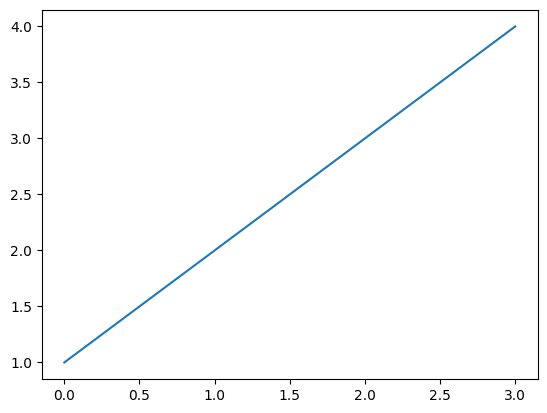

In [51]:
## 라인 그래프 출력

## 도화지에 그려질 x, y축의 수치를 지정
plt.plot([1,2,3,4])

## 그래프 출력
plt.show()

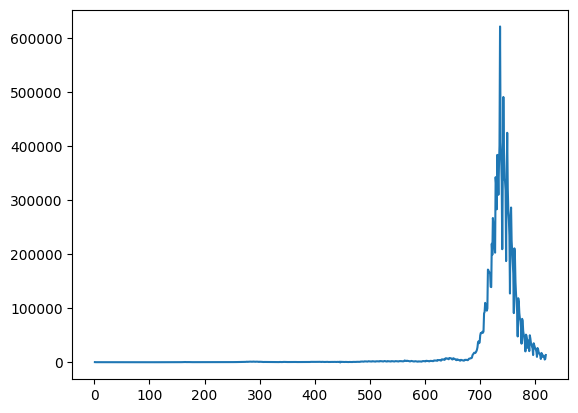

In [52]:
plt.plot(corona['일일 확진자'])
plt.show()

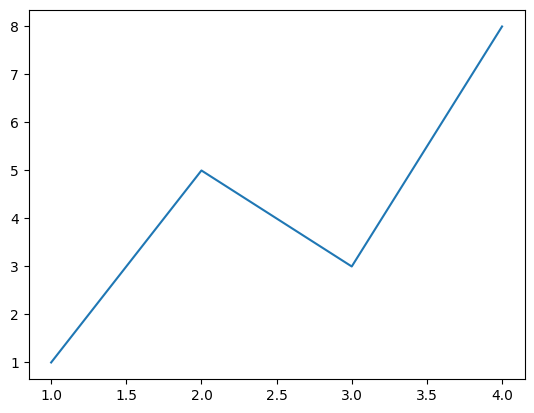

In [55]:
plt.plot([1,2,3,4],[1,5,3,8])
plt.show()

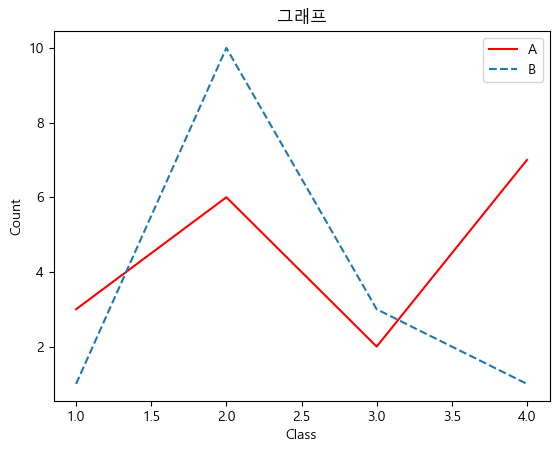

In [62]:
x= [1,2,3,4]
y1 = [3,6,2,7]
y2 = [1, 10, 3, 1]

## 한글이 깨지는 현상을 막기 위해 폰트 변경
plt.rc('font',family='Malgun Gothic')

## 선의 색
plt.plot(x, y1, 'r')
## 선의 종류
plt. plot(x,y2, '--')
## x축의 이름
plt.xlabel('Class')
## y축의 이름
plt.ylabel('Count')
## title
plt.title('그래프')
# 범례추가
plt.legend(['A','B'])


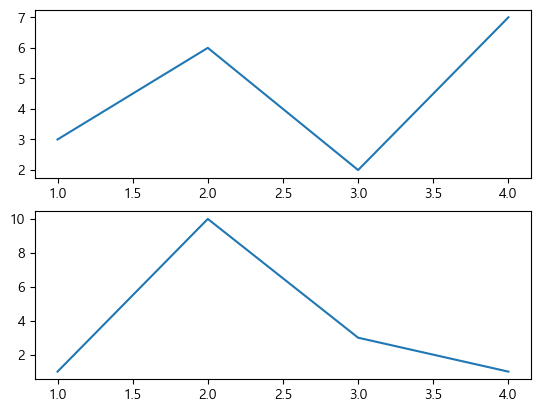

In [63]:
## subplot(행의 수, 열의 수, 위치)

## 그래프 2개 그린다는 가정

## subplot을 이용해서 위치를 지정
plt.subplot(2,1,1)
plt.plot(x, y1)
plt.subplot(2,1,2)
plt.plot(x, y2)

plt.show()

In [64]:
## 바형 그래프
x = [1,2,3,4]
y = [80,60,90,70]

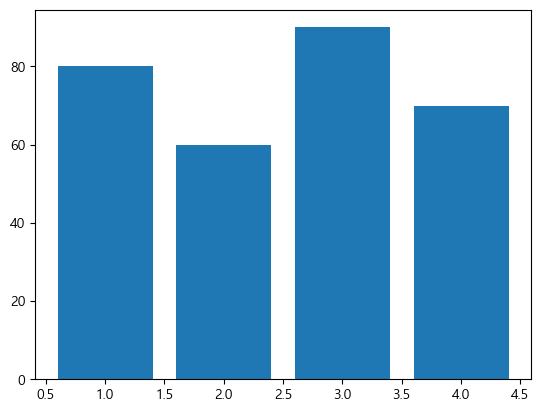

In [65]:
plt.bar(x,y)
plt.show()

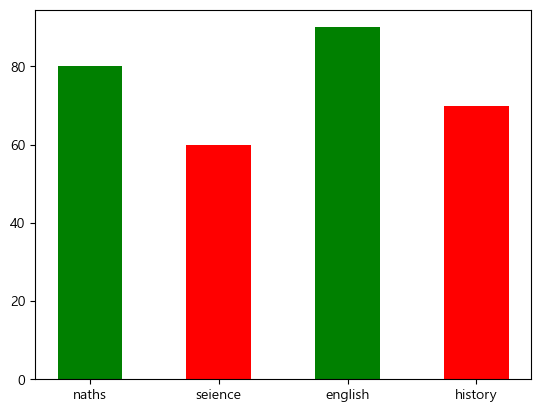

In [68]:
## 막대의 너비와 색상 변경
plt.bar(x,y,color=['g','r'], width=0.5)

## x축의 이름 변경
plt. xticks(x, ['naths','seience','english','history'])

plt.show()

In [69]:
## 산점도 그래프
import numpy as np

In [85]:
x = np.random.rand(50)
y = np.random.rand(50)

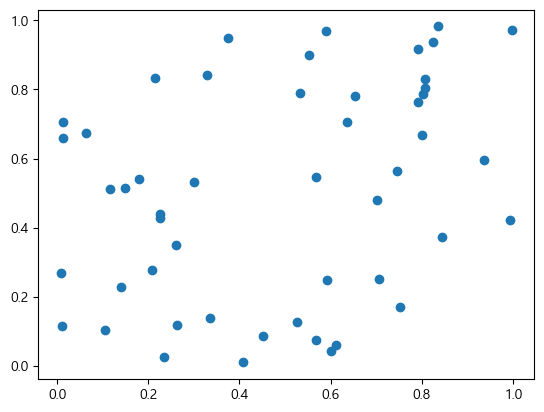

In [86]:
plt.scatter(x,y)
plt.show()

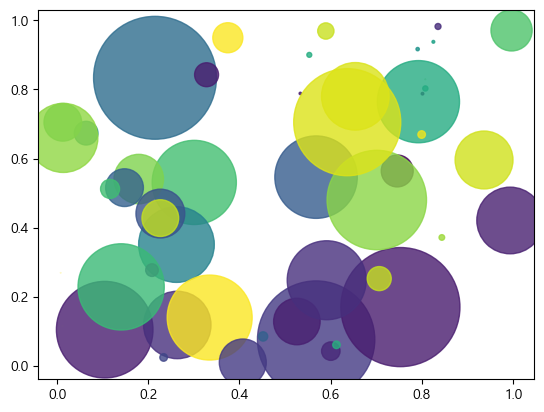

In [92]:
## 영역, 색, 투명도 변경
color = np.random.rand(50)
area = (20 * np.random.rand(50))**3

plt.scatter(x,y, s = area, c = color, alpha = 0.8)   #alpha는 투명도임
plt.show()